In [2]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 設置繪圖風格
sns.set(style='whitegrid')

# 讀取結果
results = []
for filename in os.listdir('results'):
    if filename.endswith('.json'):
        with open(os.path.join('results', filename), 'r') as f:
            data = json.load(f)
        # 從文件名中提取參數
        # 假設文件名格式為 result_bs{batch_size}_sl{seq_len}_nh{num_heads}_ed{emb_dim}_{impl}_causal.json
        params = filename.replace('result_bs', '').replace('.json', '').split('_')
        data_flat = {}
        data_flat['batch_size'] = int(params[0])
        data_flat['seq_len'] = int(params[1][2:])
        data_flat['num_heads'] = int(params[2][2:])
        data_flat['emb_dim'] = int(params[3][2:])
        data_flat['impl'] = params[4]
        data_flat['causal'] = 'causal' in filename

        # 展平嵌套的字典
        for key1 in data:
            if isinstance(data[key1], dict):
                for key2 in data[key1]:
                    # 將鍵名中的特殊字符替換為下劃線
                    new_key = f"{key1}_{key2}".replace('(', '').replace(')', '').replace('/', '_per_')
                    data_flat[new_key] = data[key1][key2]
            else:
                # 處理 'peak_memory_usage(MB)'，將鍵名標準化
                if key1 == 'peak_memory_usage(MB)':
                    data_flat['peak_memory_usage_MB'] = data[key1]
                else:
                    data_flat[key1] = data[key1]
        results.append(data_flat)

# 創建 DataFrame
df = pd.DataFrame(results)

# 檢查 DataFrame 欄位名稱和前幾行數據
print("DataFrame 欄位名稱:")
print(df.columns)

print("\nDataFrame 前幾行數據:")
print(df.head())

DataFrame 欄位名稱:
Index(['batch_size', 'seq_len', 'num_heads', 'emb_dim', 'impl', 'causal',
       'forward_times', 'forward_FLOPSTFLOPs_per_s', 'backward_times',
       'backward_FLOPSTFLOPs_per_s', 'forward_backward_times',
       'forward_backward_FLOPSTFLOPs_per_s', 'peak_memory_usage_MB'],
      dtype='object')

DataFrame 前幾行數據:
   batch_size  seq_len  num_heads  emb_dim     impl  causal  forward_times  \
0          16     1024         16     1024   Flash2    True       0.003037   
1          16     1024         16     1024   Flash2    True       0.001117   
2          16     1024         16     1024  Pytorch    True       0.006437   
3          16     1024         16     1024  Pytorch    True       0.010315   
4          16     1024         16     2048   Flash2    True       0.003644   

   forward_FLOPSTFLOPs_per_s  backward_times  backward_FLOPSTFLOPs_per_s  \
0                  22.628796        0.005431                   31.634606   
1                  30.750185        0.003406 

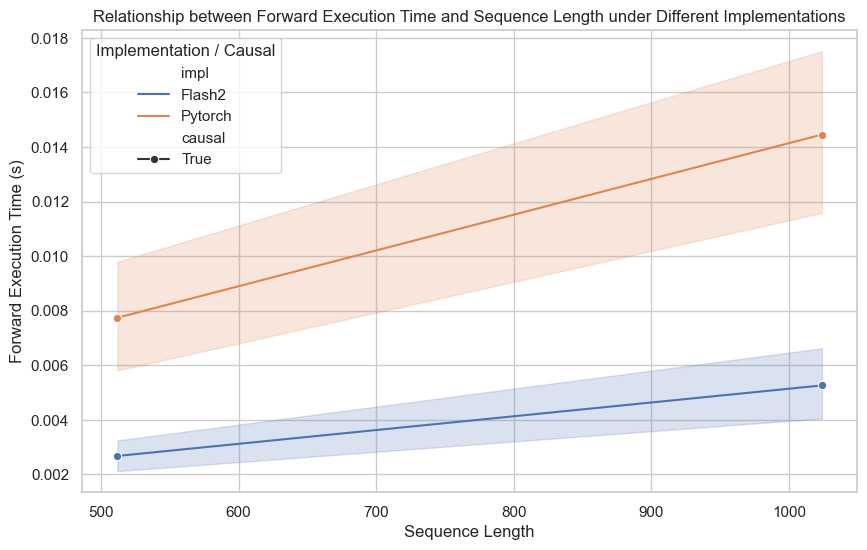

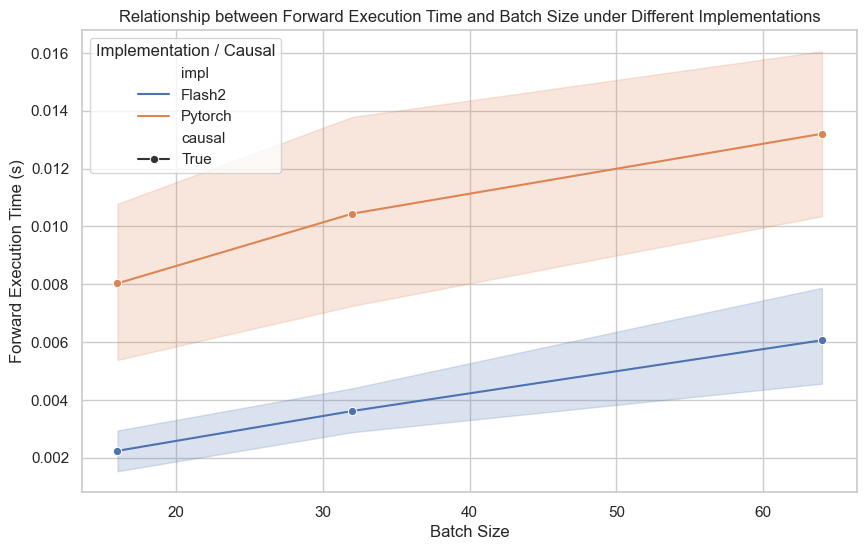

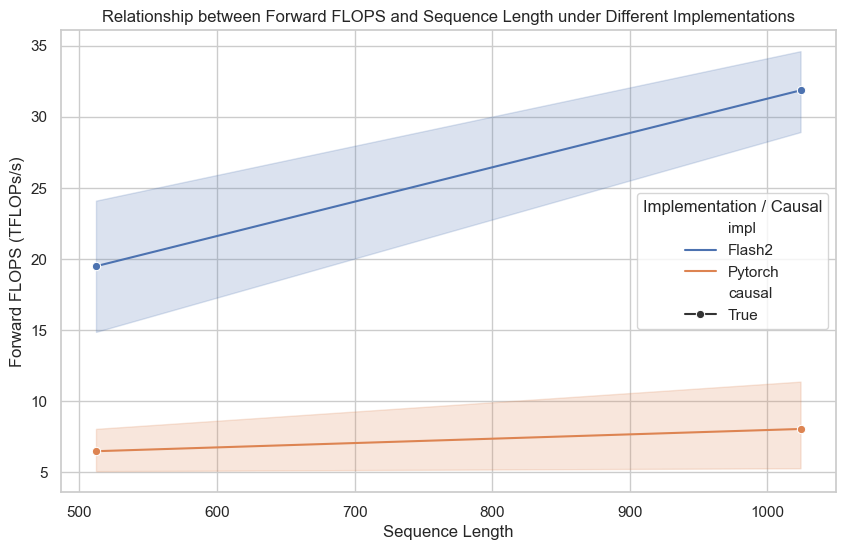

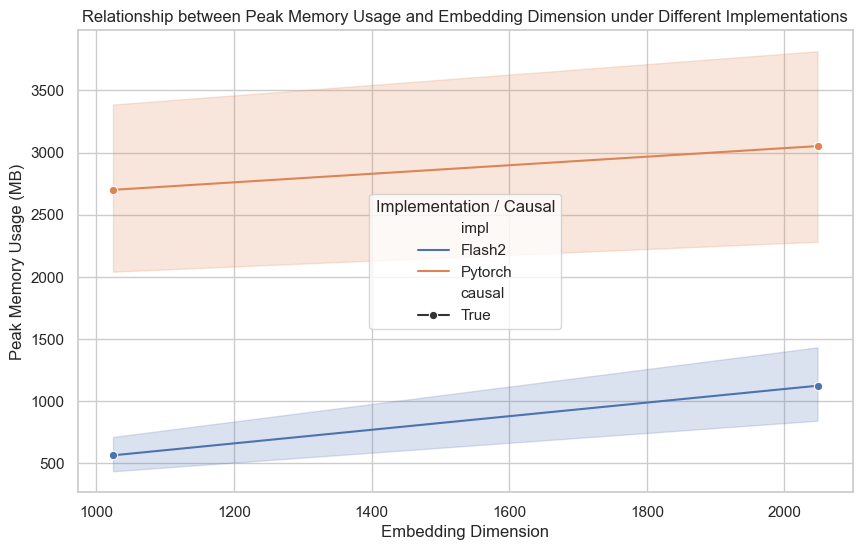

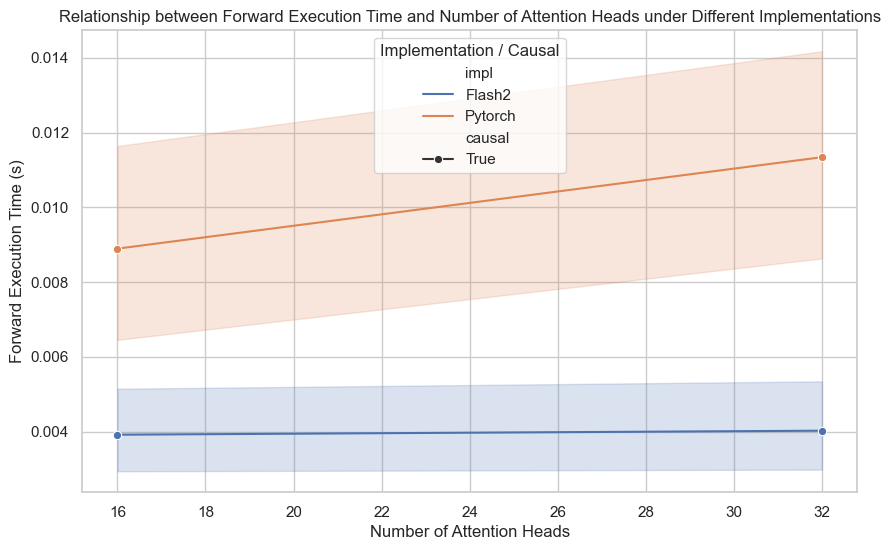

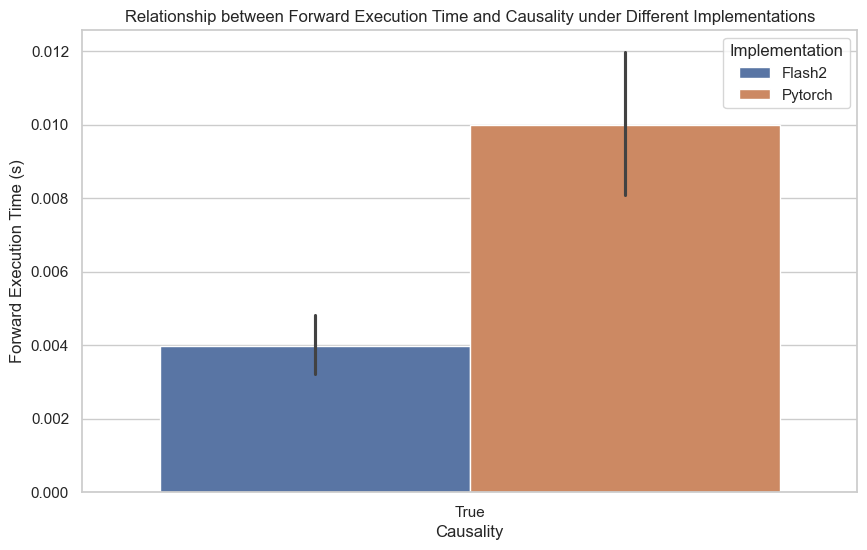

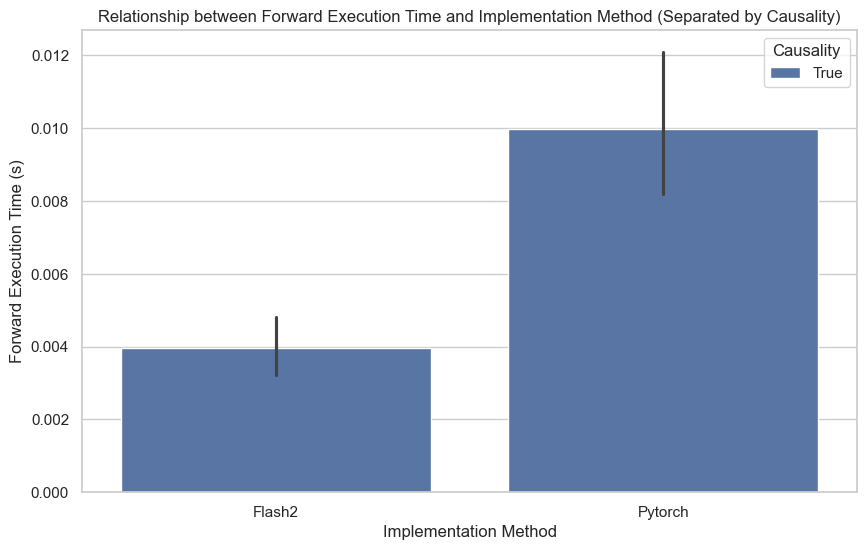

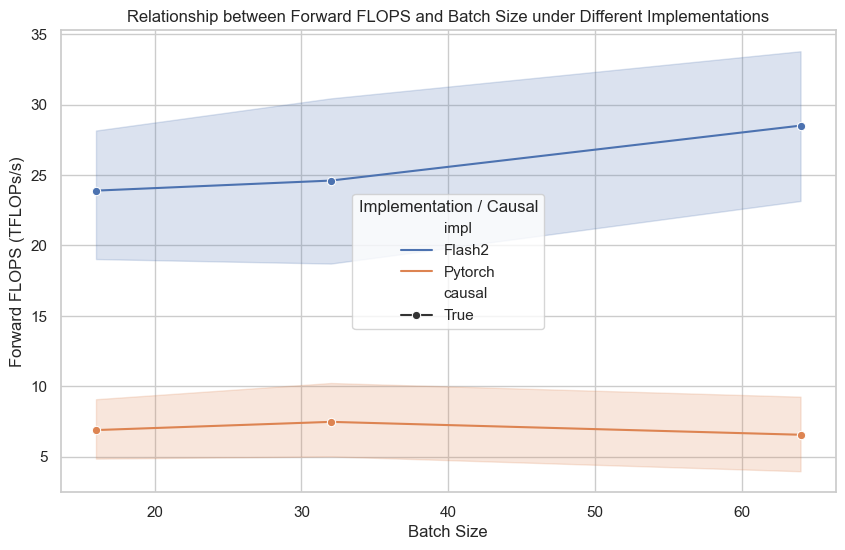

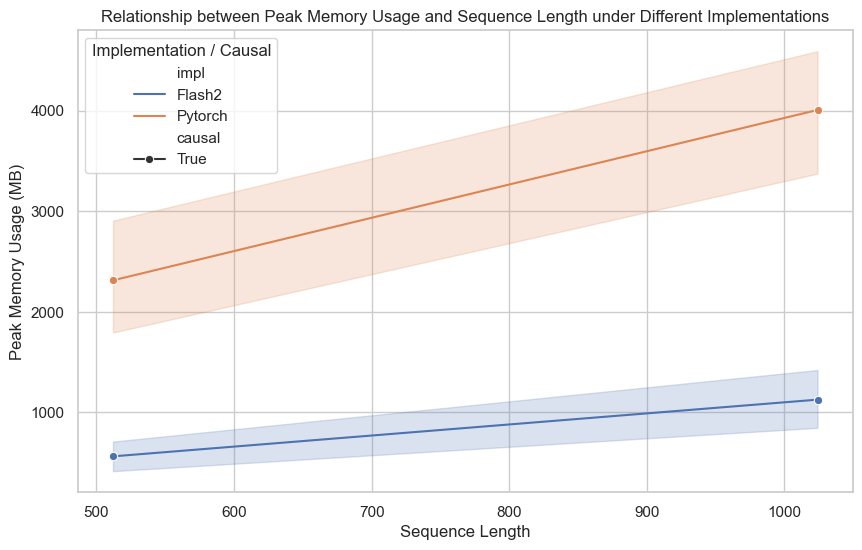

In [3]:
# Plotting Charts
# 1. Relationship between Forward Execution Time and Sequence Length
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='seq_len', y='forward_times', hue='impl', style='causal', markers=True, dashes=False)
plt.xlabel('Sequence Length')
plt.ylabel('Forward Execution Time (s)')
plt.title('Relationship between Forward Execution Time and Sequence Length under Different Implementations')
plt.legend(title='Implementation / Causal')
plt.show()

# 2. Relationship between Forward Execution Time and Batch Size
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='batch_size', y='forward_times', hue='impl', style='causal', markers=True, dashes=False)
plt.xlabel('Batch Size')
plt.ylabel('Forward Execution Time (s)')
plt.title('Relationship between Forward Execution Time and Batch Size under Different Implementations')
plt.legend(title='Implementation / Causal')
plt.show()

# 3. Relationship between Forward FLOPS and Sequence Length
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='seq_len', y='forward_FLOPSTFLOPs_per_s', hue='impl', style='causal', markers=True, dashes=False)
plt.xlabel('Sequence Length')
plt.ylabel('Forward FLOPS (TFLOPs/s)')
plt.title('Relationship between Forward FLOPS and Sequence Length under Different Implementations')
plt.legend(title='Implementation / Causal')
plt.show()

# 4. Relationship between Peak Memory Usage and Embedding Dimension
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='emb_dim', y='peak_memory_usage_MB', hue='impl', style='causal', markers=True, dashes=False)
plt.xlabel('Embedding Dimension')
plt.ylabel('Peak Memory Usage (MB)')
plt.title('Relationship between Peak Memory Usage and Embedding Dimension under Different Implementations')
plt.legend(title='Implementation / Causal')
plt.show()

# 5. Relationship between Forward Execution Time and Number of Attention Heads
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='num_heads', y='forward_times', hue='impl', style='causal', markers=True, dashes=False)
plt.xlabel('Number of Attention Heads')
plt.ylabel('Forward Execution Time (s)')
plt.title('Relationship between Forward Execution Time and Number of Attention Heads under Different Implementations')
plt.legend(title='Implementation / Causal')
plt.show()

# 6. Relationship between Forward Execution Time and Causality
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='causal', y='forward_times', hue='impl')
plt.xlabel('Causality')
plt.ylabel('Forward Execution Time (s)')
plt.title('Relationship between Forward Execution Time and Causality under Different Implementations')
plt.legend(title='Implementation')
plt.show()

# 7. Relationship between Forward Execution Time and Implementation Method
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='impl', y='forward_times', hue='causal')
plt.xlabel('Implementation Method')
plt.ylabel('Forward Execution Time (s)')
plt.title('Relationship between Forward Execution Time and Implementation Method (Separated by Causality)')
plt.legend(title='Causality')
plt.show()

# 8. Relationship between Forward FLOPS and Batch Size
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='batch_size', y='forward_FLOPSTFLOPs_per_s', hue='impl', style='causal', markers=True, dashes=False)
plt.xlabel('Batch Size')
plt.ylabel('Forward FLOPS (TFLOPs/s)')
plt.title('Relationship between Forward FLOPS and Batch Size under Different Implementations')
plt.legend(title='Implementation / Causal')
plt.show()

# 9. Relationship between Peak Memory Usage and Sequence Length
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='seq_len', y='peak_memory_usage_MB', hue='impl', style='causal', markers=True, dashes=False)
plt.xlabel('Sequence Length')
plt.ylabel('Peak Memory Usage (MB)')
plt.title('Relationship between Peak Memory Usage and Sequence Length under Different Implementations')
plt.legend(title='Implementation / Causal')
plt.show()


In [4]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 設置繪圖風格
sns.set(style='whitegrid')

# 讀取結果
results = []
for filename in os.listdir('results'):
    if filename.endswith('.json'):
        with open(os.path.join('results', filename), 'r') as f:
            data = json.load(f)
        # 從文件名中提取參數
        # 假設文件名格式為 result_bs{batch_size}_sl{seq_len}_nh{num_heads}_ed{emb_dim}_{impl}_causal.json
        params = filename.replace('result_bs', '').replace('.json', '').split('_')
        data_flat = {}
        data_flat['batch_size'] = int(params[0])
        data_flat['seq_len'] = int(params[1][2:])
        data_flat['num_heads'] = int(params[2][2:])
        data_flat['emb_dim'] = int(params[3][2:])
        data_flat['impl'] = params[4]
        data_flat['causal'] = 'causal' in filename

        # 展平嵌套的字典
        for key1 in data:
            if isinstance(data[key1], dict):
                for key2 in data[key1]:
                    # 將鍵名中的特殊字符替換為下劃線
                    new_key = f"{key1}_{key2}".replace('(', '').replace(')', '').replace('/', '_per_')
                    data_flat[new_key] = data[key1][key2]
            else:
                # 處理 'peak_memory_usage(MB)'，將鍵名標準化
                if key1 == 'peak_memory_usage(MB)':
                    data_flat['peak_memory_usage_MB'] = data[key1]
                else:
                    data_flat[key1] = data[key1]
        results.append(data_flat)

# 創建 DataFrame
df = pd.DataFrame(results)

# 檢查 DataFrame 欄位名稱和前幾行數據
print("DataFrame 欄位名稱:")
print(df.columns)

print("\nDataFrame 前幾行數據:")
print(df.head())

# 重命名欄位（如果需要）
df.rename(columns={
    'forward.time(s)': 'forward_time_s',
    'backward.time(s)': 'backward_time_s',
    'forward_backward.time(s)': 'forward_backward_time_s',
    'peak_memory_usage(MB)': 'peak_memory_usage_MB',
    'forward.FLOPS(TFLOPs/s)': 'forward_FLOPS_TFLOPs_per_s',
    'backward.FLOPS(TFLOPs/s)': 'backward_FLOPS_TFLOPs_per_s',
    'forward_backward.FLOPS(TFLOPs/s)': 'forward_backward_FLOPS_TFLOPs_per_s'
}, inplace=True)

# 檢查重命名後的欄位名稱
print("\n重命名後的 DataFrame 欄位名稱:")
print(df.columns)

# 確認 DataFrame 中是否存在 'forward_time_s' 和 'peak_memory_usage_MB'
if 'forward_time_s' not in df.columns or 'peak_memory_usage_MB' not in df.columns:
    print("\n警告：'forward_time_s' 或 'peak_memory_usage_MB' 欄位不存在。請檢查 JSON 解析代碼和 JSON 文件結構。")
    print("請確認所有 JSON 文件中都包含這些欄位，並且命名一致。")
else:
    # 處理缺失值（可選）
    df = df.dropna(subset=['forward_time_s', 'peak_memory_usage_MB'])

    # 確保數據類型正確
    df['forward_time_s'] = pd.to_numeric(df['forward_time_s'], errors='coerce')
    df['peak_memory_usage_MB'] = pd.to_numeric(df['peak_memory_usage_MB'], errors='coerce')

    # 確保繪圖時數據按照順序排列
    df.sort_values(by=['impl', 'seq_len', 'batch_size', 'num_heads', 'emb_dim'], inplace=True)

    

DataFrame 欄位名稱:
Index(['batch_size', 'seq_len', 'num_heads', 'emb_dim', 'impl', 'causal',
       'forward_times', 'forward_FLOPSTFLOPs_per_s', 'backward_times',
       'backward_FLOPSTFLOPs_per_s', 'forward_backward_times',
       'forward_backward_FLOPSTFLOPs_per_s', 'peak_memory_usage_MB'],
      dtype='object')

DataFrame 前幾行數據:
   batch_size  seq_len  num_heads  emb_dim     impl  causal  forward_times  \
0          16     1024         16     1024   Flash2    True       0.003037   
1          16     1024         16     1024   Flash2    True       0.001117   
2          16     1024         16     1024  Pytorch    True       0.006437   
3          16     1024         16     1024  Pytorch    True       0.010315   
4          16     1024         16     2048   Flash2    True       0.003644   

   forward_FLOPSTFLOPs_per_s  backward_times  backward_FLOPSTFLOPs_per_s  \
0                  22.628796        0.005431                   31.634606   
1                  30.750185        0.003406 

C:\Users\Tracy Hung\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24207 (\N{CJK UNIFIED IDEOGRAPH-5E8F}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Tracy Hung\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21015 (\N{CJK UNIFIED IDEOGRAPH-5217}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Tracy Hung\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 38263 (\N{CJK UNIFIED IDEOGRAPH-9577}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Tracy Hung\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kf

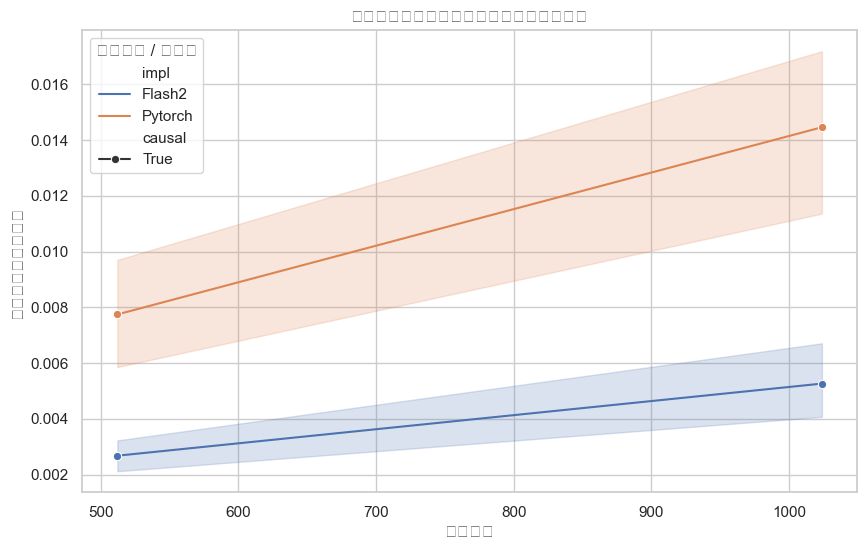

C:\Users\Tracy Hung\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25209 (\N{CJK UNIFIED IDEOGRAPH-6279}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Tracy Hung\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Tracy Hung\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Tracy Hung\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kf

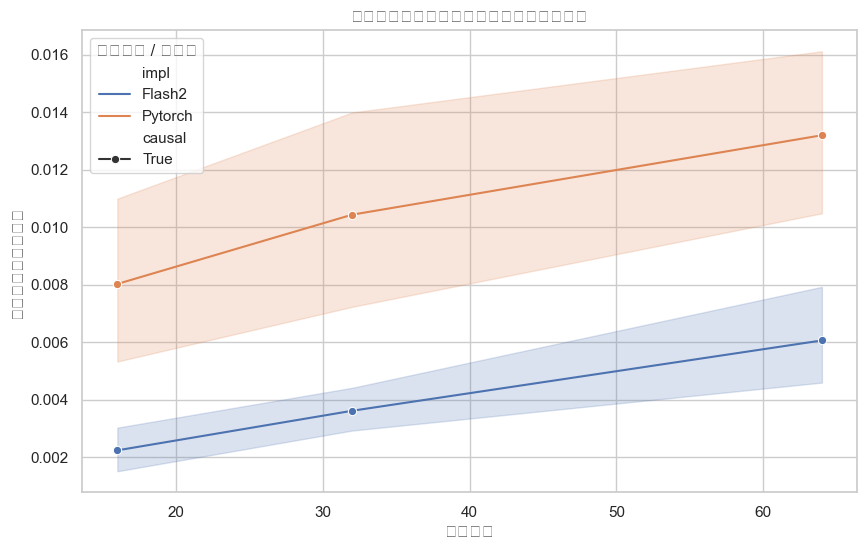

C:\Users\Tracy Hung\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24207 (\N{CJK UNIFIED IDEOGRAPH-5E8F}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Tracy Hung\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21015 (\N{CJK UNIFIED IDEOGRAPH-5217}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Tracy Hung\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 38263 (\N{CJK UNIFIED IDEOGRAPH-9577}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Tracy Hung\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kf

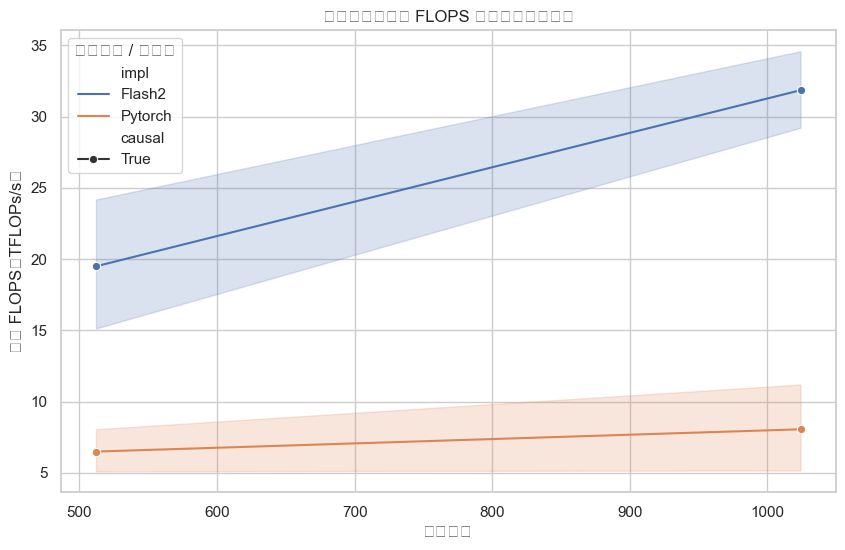

C:\Users\Tracy Hung\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23884 (\N{CJK UNIFIED IDEOGRAPH-5D4C}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Tracy Hung\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20837 (\N{CJK UNIFIED IDEOGRAPH-5165}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Tracy Hung\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32173 (\N{CJK UNIFIED IDEOGRAPH-7DAD}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Tracy Hung\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kf

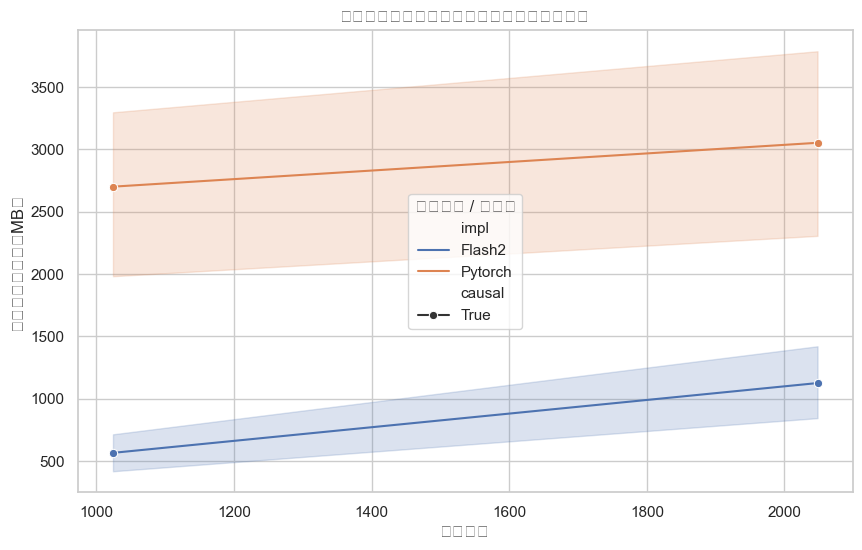

C:\Users\Tracy Hung\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27880 (\N{CJK UNIFIED IDEOGRAPH-6CE8}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Tracy Hung\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24847 (\N{CJK UNIFIED IDEOGRAPH-610F}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Tracy Hung\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21147 (\N{CJK UNIFIED IDEOGRAPH-529B}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Tracy Hung\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kf

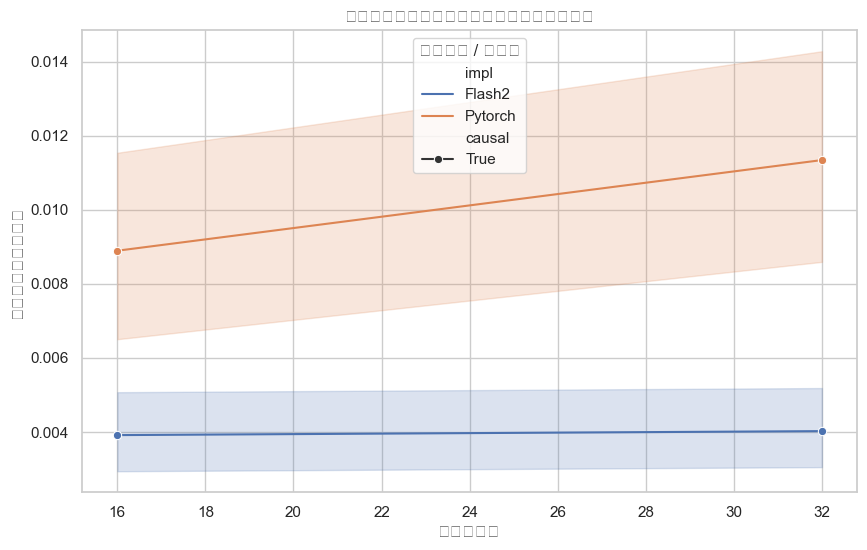

C:\Users\Tracy Hung\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22240 (\N{CJK UNIFIED IDEOGRAPH-56E0}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Tracy Hung\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26524 (\N{CJK UNIFIED IDEOGRAPH-679C}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Tracy Hung\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Tracy Hung\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kf

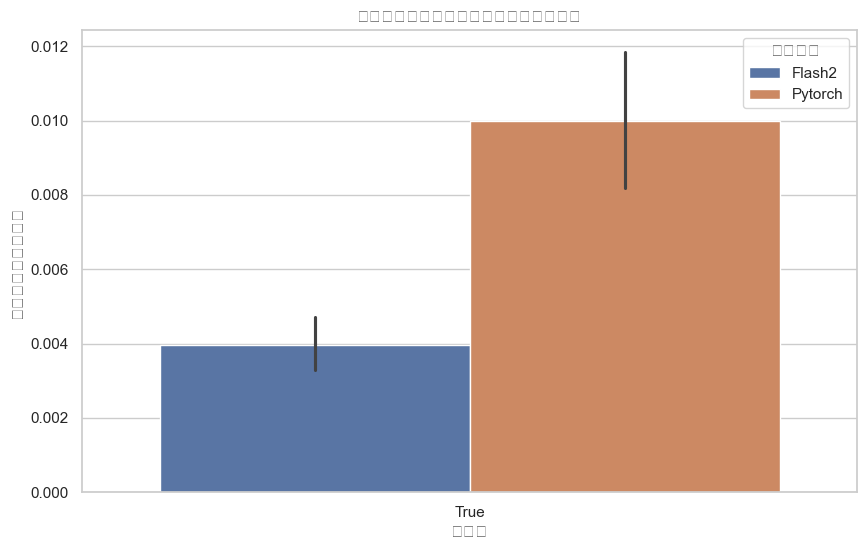

C:\Users\Tracy Hung\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23526 (\N{CJK UNIFIED IDEOGRAPH-5BE6}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Tracy Hung\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 29694 (\N{CJK UNIFIED IDEOGRAPH-73FE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Tracy Hung\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26041 (\N{CJK UNIFIED IDEOGRAPH-65B9}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Tracy Hung\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kf

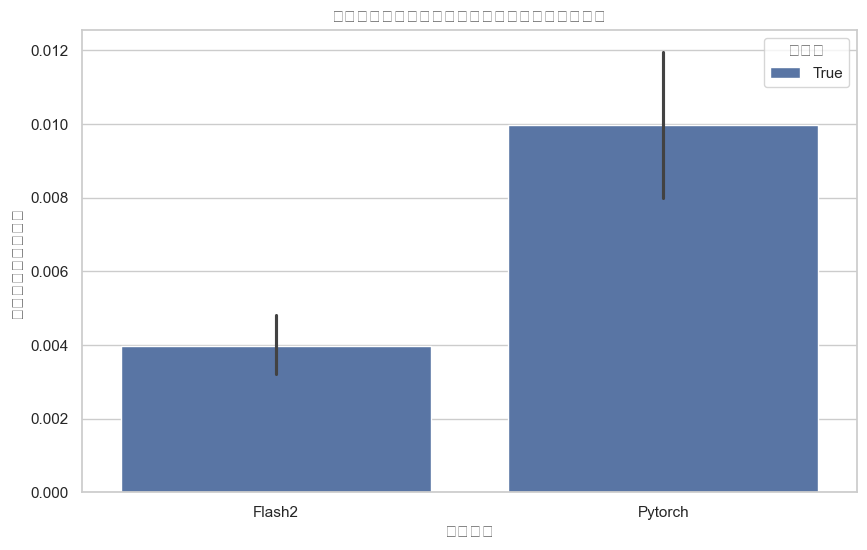

C:\Users\Tracy Hung\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25209 (\N{CJK UNIFIED IDEOGRAPH-6279}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Tracy Hung\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Tracy Hung\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Tracy Hung\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kf

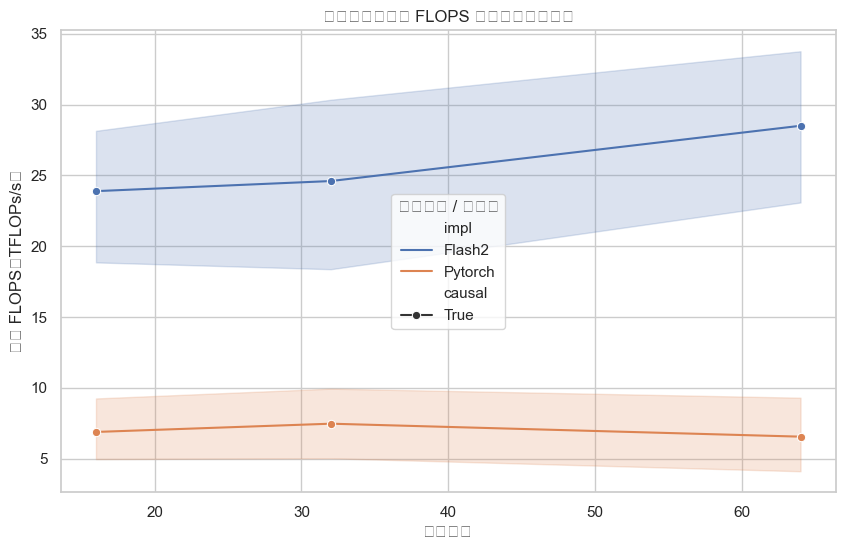

C:\Users\Tracy Hung\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24207 (\N{CJK UNIFIED IDEOGRAPH-5E8F}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Tracy Hung\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21015 (\N{CJK UNIFIED IDEOGRAPH-5217}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Tracy Hung\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 38263 (\N{CJK UNIFIED IDEOGRAPH-9577}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Tracy Hung\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kf

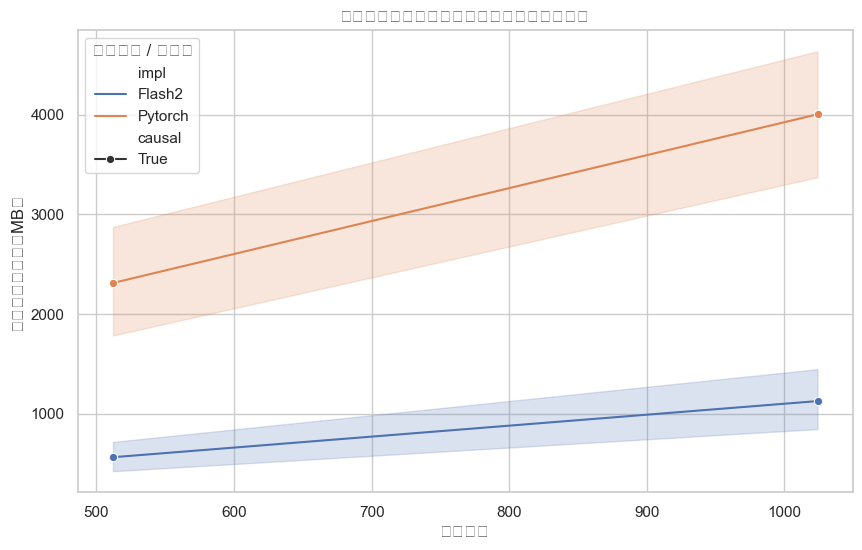

In [5]:
# 繪製圖表
# 1. 前向執行時間與序列長度的關係
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='seq_len', y='forward_times', hue='impl', style='causal', markers=True, dashes=False)
plt.xlabel('序列長度')
plt.ylabel('前向執行時間（秒）')
plt.title('不同實現下前向執行時間與序列長度的關係')
plt.legend(title='實現方式 / 因果性')
plt.show()

# 2. 前向執行時間與批量大小的關係
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='batch_size', y='forward_times', hue='impl', style='causal', markers=True, dashes=False)
plt.xlabel('批量大小')
plt.ylabel('前向執行時間（秒）')
plt.title('不同實現下前向執行時間與批量大小的關係')
plt.legend(title='實現方式 / 因果性')
plt.show()

# 3. 前向 FLOPS 與序列長度的關係
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='seq_len', y='forward_FLOPSTFLOPs_per_s', hue='impl', style='causal', markers=True, dashes=False)
plt.xlabel('序列長度')
plt.ylabel('前向 FLOPS（TFLOPs/s）')
plt.title('不同實現下前向 FLOPS 與序列長度的關係')
plt.legend(title='實現方式 / 因果性')
plt.show()

# 4. 峰值內存使用量與嵌入維度的關係
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='emb_dim', y='peak_memory_usage_MB', hue='impl', style='causal', markers=True, dashes=False)
plt.xlabel('嵌入維度')
plt.ylabel('峰值內存使用量（MB）')
plt.title('不同實現下峰值內存使用量與嵌入維度的關係')
plt.legend(title='實現方式 / 因果性')
plt.show()

# 5. 前向執行時間與注意力頭數的關係
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='num_heads', y='forward_times', hue='impl', style='causal', markers=True, dashes=False)
plt.xlabel('注意力頭數')
plt.ylabel('前向執行時間（秒）')
plt.title('不同實現下前向執行時間與注意力頭數的關係')
plt.legend(title='實現方式 / 因果性')
plt.show()

# 6. 前向執行時間與因果性（causal）的關係
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='causal', y='forward_times', hue='impl')
plt.xlabel('因果性')
plt.ylabel('前向執行時間（秒）')
plt.title('不同實現下前向執行時間與因果性的關係')
plt.legend(title='實現方式')
plt.show()

# 7. 前向執行時間與實現方式的關係
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='impl', y='forward_times', hue='causal')
plt.xlabel('實現方式')
plt.ylabel('前向執行時間（秒）')
plt.title('前向執行時間與實現方式的關係（按因果性區分）')
plt.legend(title='因果性')
plt.show()

# 8. 前向 FLOPS 與批量大小的關係
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='batch_size', y='forward_FLOPSTFLOPs_per_s', hue='impl', style='causal', markers=True, dashes=False)
plt.xlabel('批量大小')
plt.ylabel('前向 FLOPS（TFLOPs/s）')
plt.title('不同實現下前向 FLOPS 與批量大小的關係')
plt.legend(title='實現方式 / 因果性')
plt.show()

# 9. 峰值內存使用量與序列長度的關係
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='seq_len', y='peak_memory_usage_MB', hue='impl', style='causal', markers=True, dashes=False)
plt.xlabel('序列長度')
plt.ylabel('峰值內存使用量（MB）')
plt.title('不同實現下峰值內存使用量與序列長度的關係')
plt.legend(title='實現方式 / 因果性')
plt.show()


In [6]:
# 2. 前向執行時間與批量大小的關係
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='batch_size', y='forward_time_s', hue='impl', style='causal', markers=True, dashes=False)
plt.xlabel('批量大小')
plt.ylabel('前向執行時間（秒）')
plt.title('不同實現下前向執行時間與批量大小的關係')
plt.legend(title='實現方式 / 因果性')
plt.show()

ValueError: Could not interpret value `forward_time_s` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [ ]:
# 3. 前向 FLOPS 與序列長度的關係
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='seq_len', y='forward_FLOPS_TFLOPs_per_s', hue='impl', style='causal', markers=True, dashes=False)
plt.xlabel('序列長度')
plt.ylabel('前向 FLOPS（TFLOPs/s）')
plt.title('不同實現下前向 FLOPS 與序列長度的關係')
plt.legend(title='實現方式 / 因果性')
plt.show()

In [ ]:
# 4. 峰值內存使用量與嵌入維度的關係
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='emb_dim', y='peak_memory_usage_MB', hue='impl', style='causal', markers=True, dashes=False)
plt.xlabel('嵌入維度')
plt.ylabel('峰值內存使用量（MB）')
plt.title('不同實現下峰值內存使用量與嵌入維度的關係')
plt.legend(title='實現方式 / 因果性')
plt.show()

In [ ]:
# 5. 前向執行時間與注意力頭數的關係
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='num_heads', y='forward_time_s', hue='impl', style='causal', markers=True, dashes=False)
plt.xlabel('注意力頭數')
plt.ylabel('前向執行時間（秒）')
plt.title('不同實現下前向執行時間與注意力頭數的關係')
plt.legend(title='實現方式 / 因果性')
plt.show()


In [ ]:
# 6. 前向執行時間與因果性（causal）的關係
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='causal', y='forward_time_s', hue='impl')
plt.xlabel('因果性')
plt.ylabel('前向執行時間（秒）')
plt.title('不同實現下前向執行時間與因果性的關係')
plt.legend(title='實現方式')
plt.show()

In [ ]:
# 7. 前向執行時間與實現方式的關係
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='impl', y='forward_time_s', hue='causal')
plt.xlabel('實現方式')
plt.ylabel('前向執行時間（秒）')
plt.title('前向執行時間與實現方式的關係（按因果性區分）')
plt.legend(title='因果性')
plt.show()

In [ ]:

# 8. 前向 FLOPS 與批量大小的關係
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='batch_size', y='forward_FLOPS_TFLOPs_per_s', hue='impl', style='causal', markers=True, dashes=False)
plt.xlabel('批量大小')
plt.ylabel('前向 FLOPS（TFLOPs/s）')
plt.title('不同實現下前向 FLOPS 與批量大小的關係')
plt.legend(title='實現方式 / 因果性')
plt.show()

In [ ]:
# 9. 峰值內存使用量與序列長度的關係
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='seq_len', y='peak_memory_usage_MB', hue='impl', style='causal', markers=True, dashes=False)
plt.xlabel('序列長度')
plt.ylabel('峰值內存使用量（MB）')
plt.title('不同實現下峰值內存使用量與序列長度的關係')
plt.legend(title='實現方式 / 因果性')
plt.show()